In [2]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import os
import math
import operator
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import sklearn.neighbors as sn
import seaborn as sns; sns.set()
from statistics import stdev,mean
import scipy.stats as ss
from sklearn.preprocessing import scale

In [3]:
loan = pd.read_csv("./LoanDataset/data.csv")

In [4]:
loan[loan['exp'] < 0] = 0
loan.output = loan.output.round()
loan.sec = loan.sec.round()
loan.Cd = loan.Cd.round()
loan.IB = loan.IB.round()
loan.UB = loan.UB.round()
print(loan.keys())
y_loan = loan.output.values
print(len(loan.output.unique()))
X_loan = loan.iloc[:,:]
X_loan = X_loan.drop('id', axis = 1)
X_loan = X_loan.drop('zip', axis = 1)
print(y_loan.shape)
print(X_loan.shape)
X_loan_train,X_loan_val,y_loan_train,y_loan_val=train_test_split(X_loan,y_loan,test_size=0.2,stratify=y_loan,random_state=42)

Index(['id', 'age', 'exp', 'inc', 'zip', 'fam', 'spend', 'educ', 'mort',
       'output', 'sec', 'Cd', 'IB', 'UB'],
      dtype='object')
2
(4500,)
(4500, 12)


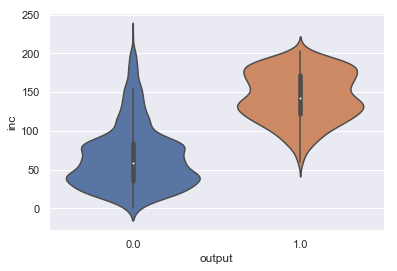

In [6]:
sns.violinplot(data = loan , x = 'output', y = 'inc')


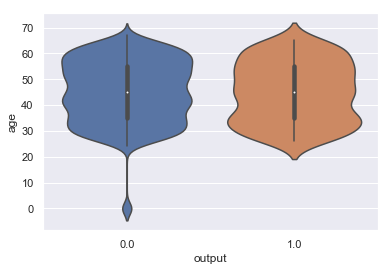

In [7]:
sns.violinplot(data = loan , x = 'output', y = 'age')


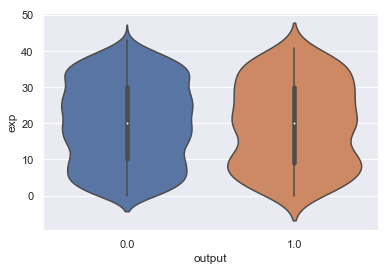

In [8]:
sns.violinplot(data = loan , x = 'output', y = 'exp')

In [5]:
def pdf(mean,sdv,num):
    a = ss.norm(mean,sdv).pdf(num)
    #print(mean,sdv,num,a)
    return a

In [6]:
def naive_bayes(inst,data):
    maxim = -100000
    for label in data.output.unique():
        df = data[(data['output'] == label)]
        df = df.drop('output', axis = 1)
        #print(df)
        #print(df.keys())
        log_sum = 0
        for i in range(0,len(inst)):
            #print(df.keys()[i])
            arr = df.iloc[:,i].values
            Mean = mean(arr)
            std = stdev(arr)
            log_sum += math.log2(pdf(Mean,std,inst[i]))
        log_sum += math.log2(float(df.shape[0])) - math.log2(float(data.shape[0]))
        #print(maxim,product,label)
        if maxim < log_sum:
            maxim = log_sum
            Class = label
            
    return Class
        
        
    
    
    

In [11]:
def print_measures1(train_data,val_data,val_class):
    pred = []
    val_data = val_data.drop('output', axis = 1)
    for i in range(0,val_data.shape[0]):
        inst = val_data.iloc[i,:].values
        pred.append(naive_bayes(inst,train_data))

    print("F1-score",f1_score(val_class,pred, average = 'micro'))
    print("precision",precision_score(val_class,pred, average = 'micro'))
    print("Accuracy",accuracy_score(val_class,pred))
    print("Recall",recall_score(val_class,pred, average = 'micro'))
    return accuracy_score(val_class,pred)


In [ ]:
print_measures1(X_loan_train,X_loan_val,y_loan_val)